In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
customers = pd.read_csv(r"C:\Users\Admin\Downloads\Customers (1).csv")

In [4]:
details = pd.read_csv(r"C:\Users\Admin\Downloads\Details (1).csv")

In [5]:
orders = pd.read_csv(r"C:\Users\Admin\Downloads\Orders.csv")

In [6]:
card = pd.read_csv(r"C:\Users\Admin\Downloads\Card.csv")

In [7]:
cuisine = pd.read_csv(r"C:\Users\Admin\Downloads\Cuisine.csv")

In [8]:
dish = pd.read_csv(r"C:\Users\Admin\Downloads\Dish.csv")

In [9]:
customers.head()

,user_id,name,email,password
0,1,Aniket,Aniket@gmail.com,p252h
1,2,Khushboo,Khushboo@gmail.com,hxn9b
2,3,Vartika,Vartika@gmail.com,9hu7j
3,4,Khushboo,Khushboo@yahoo.com,lkko3
4,5,Nutan,Nutan@yahoo.com,3i7qm


In [10]:
dish.head()

,f_id,f_name,type
0,1,Non-veg Pizza,Non-veg
1,2,Veg Pizza,Veg
2,3,Choco Lava cake,Veg
3,4,Chicken Wings,Non-veg
4,5,Chicken Popcorn,Non-veg


In [11]:
details.head()

,id,order_id,f_id
0,1,1001,1
1,2,1001,3
2,3,1002,4
3,4,1002,3
4,5,1003,6


In [12]:
orders.head()

,order_id,user_id,r_id,amount,date,delivery_time,delivery_rating,restaurant_rating
0,1001,1,1,550.0,2022-05-10,25.0,5.0,3.0
1,1002,1,2,415.0,2022-05-26,19.0,5.0,2.0
2,1003,1,3,240.0,2022-06-15,29.0,4.0,NaN
3,1004,1,3,240.0,2022-06-29,42.0,3.0,5.0
4,1005,1,3,220.0,2022-07-10,58.0,1.0,4.0


In [13]:
cuisine.head()

,r_id,r_name,cuisine,address,city,state,zipcode,phone
0,1,dominos,Italian,123 Main St,Anytown,CA,31312,333-4231
1,2,kfc,American,433 Oak St,Anytown,CA,23432,342-4535
2,3,box8,North Indian,St 457,Anytown,CA,12233,411-3453
3,4,Dosa Plaza,South Indian,824 Oak St,Anytown,CA,23432,242-2311
4,5,China Town,Chinese,983 Elm St,Anytown,CA,76676,434-6544


In [14]:
card.head()

,menu_id,r_id,f_id,price
0,1,1,1,450.0
1,2,1,2,400.0
2,3,1,3,100.0
3,4,2,3,115.0
4,5,2,4,230.0


In [15]:
df = orders.merge(customers,on = "user_id",how = "left")
df = df.merge(cuisine,on = "r_id",how = "left")
df = df.merge(details, on = "order_id", how = "left")
df = df.merge(dish, on = "f_id", how = "left")
df = df.merge(card, on = ["f_id","r_id"], how = "left")
df.head()

,order_id,user_id,r_id,amount,date,delivery_time,delivery_rating,restaurant_rating,name,email,...,city,state,zipcode,phone,id,f_id,f_name,type,menu_id,price
0,1001,1,1,550.0,2022-05-10,25.0,5.0,3.0,Aniket,Aniket@gmail.com,...,Anytown,CA,31312,333-4231,1,1,Non-veg Pizza,Non-veg,1.0,450.0
1,1001,1,1,550.0,2022-05-10,25.0,5.0,3.0,Aniket,Aniket@gmail.com,...,Anytown,CA,31312,333-4231,2,3,Choco Lava cake,Veg,3.0,100.0
2,1002,1,2,415.0,2022-05-26,19.0,5.0,2.0,Aniket,Aniket@gmail.com,...,Anytown,CA,23432,342-4535,3,4,Chicken Wings,Non-veg,5.0,230.0
3,1002,1,2,415.0,2022-05-26,19.0,5.0,2.0,Aniket,Aniket@gmail.com,...,Anytown,CA,23432,342-4535,4,3,Choco Lava cake,Veg,4.0,115.0
4,1003,1,3,240.0,2022-06-15,29.0,4.0,NaN,Aniket,Aniket@gmail.com,...,Anytown,CA,12233,411-3453,5,6,Rice Meal,Veg,8.0,160.0


In [16]:
data = df.copy()

In [17]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data["day_of_week"] = data["date"].dt.dayofweek
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day
data["is_weekend"] = data["date"].dt.dayofweek.isin([5,6]).astype(int)


In [19]:
#prepare all aggregates
cust  = data.groupby("user_id").agg(
    customer_total_orders=("order_id","count"),
    customer_avg_amount=("amount","mean"),
    customer_avg_rating=("delivery_rating","mean")
).reset_index()
cust

,user_id,customer_total_orders,customer_avg_amount,customer_avg_rating
0,1,10,333.000000,3.600000
1,2,12,578.333333,2.500000
2,3,5,264.000000,3.200000
3,4,10,360.000000,3.200000
4,5,13,615.769231,3.615385


In [20]:
data=data.merge(cust, on="user_id", how= "left")
print(data)

    order_id  user_id  r_id  amount       date  delivery_time  \
0       1001        1     1   550.0 2022-05-10           25.0   
1       1001        1     1   550.0 2022-05-10           25.0   
2       1002        1     2   415.0 2022-05-26           19.0   
3       1002        1     2   415.0 2022-05-26           19.0   
4       1003        1     3   240.0 2022-06-15           29.0   
5       1003        1     3   240.0 2022-06-15           29.0   
6       1004        1     3   240.0 2022-06-29           42.0   
7       1004        1     3   240.0 2022-06-29           42.0   
8       1005        1     3   220.0 2022-07-10           58.0   
9       1005        1     3   220.0 2022-07-10           58.0   
10      1006        2     1   950.0 2022-06-10           16.0   
11      1006        2     1   950.0 2022-06-10           16.0   
12      1006        2     1   950.0 2022-06-10           16.0   
13      1007        2     2   530.0 2022-06-23           60.0   
14      1007        2    

In [21]:
#avgerage delivery time for restaurants
rest_avg_timing = df.groupby("r_id")["delivery_time"].mean().rename("restaurant_avg_timing")
#avg restaurant rating.
rest_avg_rating = data.groupby("r_id")["restaurant_rating"].mean().rename("restaurant_avg_rating")

In [22]:
data = data.merge(rest_avg_timing, on="r_id",how="left")
data = data.merge(rest_avg_rating, on="r_id",how="left")

In [23]:
print(data)

    order_id  user_id  r_id  amount       date  delivery_time  \
0       1001        1     1   550.0 2022-05-10           25.0   
1       1001        1     1   550.0 2022-05-10           25.0   
2       1002        1     2   415.0 2022-05-26           19.0   
3       1002        1     2   415.0 2022-05-26           19.0   
4       1003        1     3   240.0 2022-06-15           29.0   
5       1003        1     3   240.0 2022-06-15           29.0   
6       1004        1     3   240.0 2022-06-29           42.0   
7       1004        1     3   240.0 2022-06-29           42.0   
8       1005        1     3   220.0 2022-07-10           58.0   
9       1005        1     3   220.0 2022-07-10           58.0   
10      1006        2     1   950.0 2022-06-10           16.0   
11      1006        2     1   950.0 2022-06-10           16.0   
12      1006        2     1   950.0 2022-06-10           16.0   
13      1007        2     2   530.0 2022-06-23           60.0   
14      1007        2    

In [24]:
# item counts per order
order_item_count = data.groupby("order_id")["f_id"].count().rename("items_in_order")

data = data.merge(order_item_count, on = "order_id",how = "left")

In [25]:
# already available from card table
data["price_per_item"] = data["price"]

In [26]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['name','email','cuisine','f_name','type','r_name','city', 'state']

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))
                                    

In [27]:
data = data.fillna(data.mean(numeric_only = True))

In [28]:
final_df = data[[
    'amount','day_of_week','month','day','is_weekend','customer_total_orders','customer_avg_amount','customer_avg_rating'
    ,'restaurant_avg_timing','items_in_order','price_per_item','name', 'email','r_name', 'cuisine','f_name', 'type','city', 'state', 'delivery_time']]

In [29]:
data.columns

Index(['order_id', 'user_id', 'r_id', 'amount', 'date', 'delivery_time',
       'delivery_rating', 'restaurant_rating', 'name', 'email', 'password',
       'r_name', 'cuisine', 'address', 'city', 'state', 'zipcode', 'phone',
       'id', 'f_id', 'f_name', 'type', 'menu_id', 'price', 'day_of_week',
       'month', 'day', 'is_weekend', 'customer_total_orders',
       'customer_avg_amount', 'customer_avg_rating', 'restaurant_avg_timing',
       'restaurant_avg_rating', 'items_in_order', 'price_per_item'],
      dtype='object')

In [30]:
final_df.head()

,amount,day_of_week,month,day,is_weekend,customer_total_orders,customer_avg_amount,customer_avg_rating,restaurant_avg_timing,items_in_order,price_per_item,name,email,r_name,cuisine,f_name,type,city,state,delivery_time
0,550.0,1,5,10,0,10,333.0,3.6,23.5000,2,450.0,0,0,3,2,4,0,0,0,25.0
1,550.0,1,5,10,0,10,333.0,3.6,23.5000,2,100.0,0,0,3,2,2,1,0,0,25.0
2,415.0,3,5,26,0,10,333.0,3.6,43.6875,2,230.0,0,0,4,0,1,0,0,0,19.0
3,415.0,3,5,26,0,10,333.0,3.6,43.6875,2,115.0,0,0,4,0,2,1,0,0,19.0
4,240.0,2,6,15,0,10,333.0,3.6,40.5000,2,160.0,0,0,2,3,6,1,0,0,29.0


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 50 non-null     float64
 1   day_of_week            50 non-null     int32  
 2   month                  50 non-null     int32  
 3   day                    50 non-null     int32  
 4   is_weekend             50 non-null     int64  
 5   customer_total_orders  50 non-null     int64  
 6   customer_avg_amount    50 non-null     float64
 7   customer_avg_rating    50 non-null     float64
 8   restaurant_avg_timing  50 non-null     float64
 9   items_in_order         50 non-null     int64  
 10  price_per_item         50 non-null     float64
 11  name                   50 non-null     int64  
 12  email                  50 non-null     int64  
 13  r_name                 50 non-null     int64  
 14  cuisine                50 non-null     int64  
 15  f_name  

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score

In [33]:
df = final_df.copy()

In [34]:
x = df.drop(columns=["delivery_time"])
y = df["delivery_time"]

In [35]:
#train test split
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
#train modelon linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
lr_pred = lr.predict(x_test)  #prediction

In [38]:
lr_pred

array([39.98044559, 29.76986815, 49.47772396, 44.81842078, 56.95812446,
       50.00039789, 40.82977599, 46.24709011, 40.72154367, 70.14633594])

In [39]:
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(x_train, y_train)

#predictions for test set
rf_preds = rf.predict(x_test)

#Evaluation metrics

rf_mae = mean_absolute_error(y_test, rf_preds) #MAE tells how wrong our predictions are on average
rf_r2 = r2_score(y_test, rf_preds) # R2 shows how much variance in delivery time the model is able to explain


In [40]:
print("Linear Regression:")
print("MAE:", round(lr_mae, 2))
print("R2 Score:", round(lr_r2, 2))

print("\nRandom Forest:")
print("MAE:",round(rf_mae, 2))
print("R2 Score:", round(rf_r2, 2))

Linear Regression:
MAE: 9.24
R2 Score: 0.2

Random Forest:
MAE: 6.96
R2 Score: 0.43


In [41]:
#select best model
if rf_r2 > lr_r2:
    best_model = rf
    print("\nRandom Forest is performing better. This will be our final model.")
else:
    best_model = lr
    print("\nLinear Regression is performing better, This will be our final model.")


Random Forest is performing better. This will be our final model.


In [42]:
import pickle 

with open("delivery_time_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

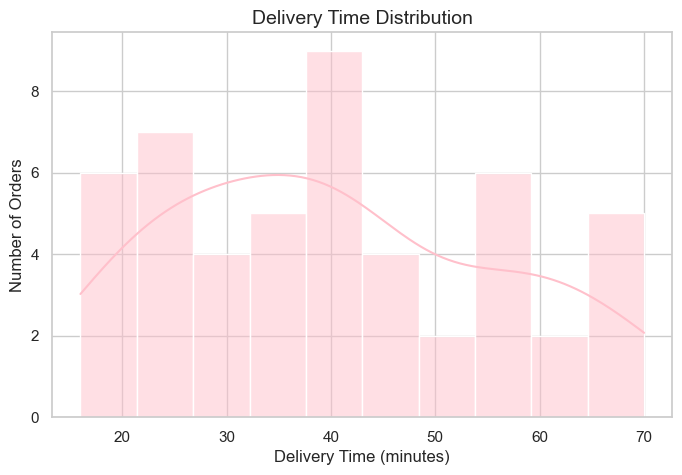

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# set a simple clean style
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))

#plot delivery time distribution
sns.histplot(final_df["delivery_time"], bins=10, kde=True,color = 'pink')

plt.title("Delivery Time Distribution", fontsize=14)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()



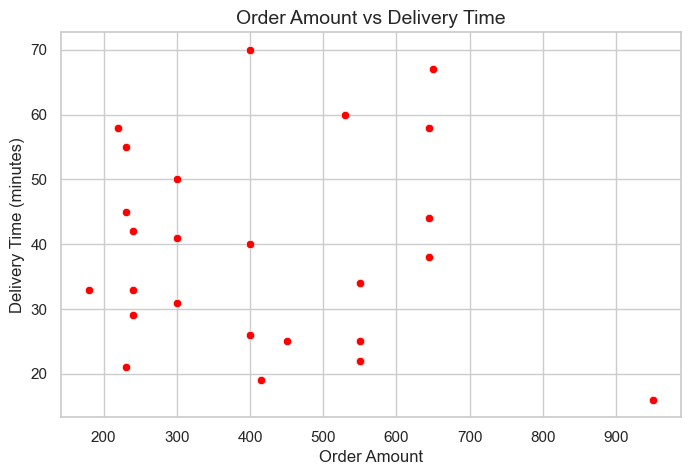

In [44]:
#Delivery Time vs Amount (Is costly order delivered faster?)
plt.figure(figsize=(8,5))

sns.scatterplot(data=final_df, x="amount", y="delivery_time",color = "red")

plt.title("Order Amount vs Delivery Time", fontsize=14)
plt.xlabel("Order Amount")
plt.ylabel("Delivery Time (minutes)")
plt.show()



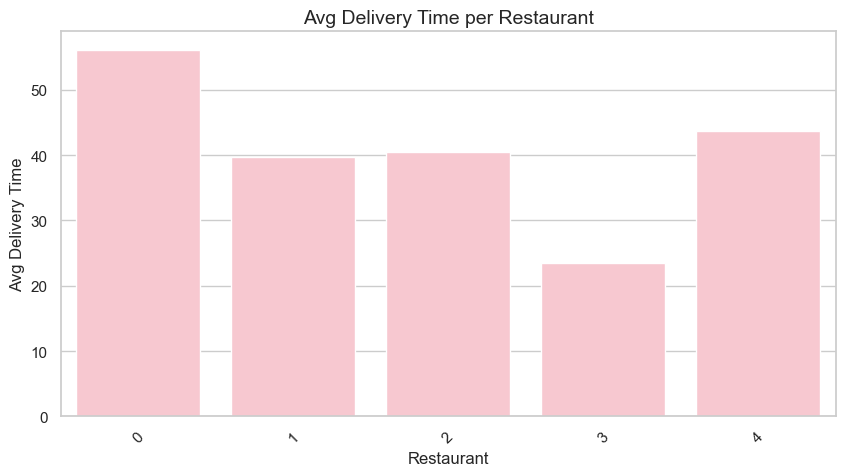

In [46]:
#Restaurant average delivery time
plt.figure(figsize=(10,5))

avg_time = final_df.groupby("r_name")["delivery_time"].mean().reset_index()

sns.barplot(data=avg_time, x="r_name", y="delivery_time", color = 'pink')

plt.title("Avg Delivery Time per Restaurant", fontsize=14)
plt.xlabel("Restaurant")
plt.ylabel("Avg Delivery Time")
plt.xticks(rotation=45)
plt.show()

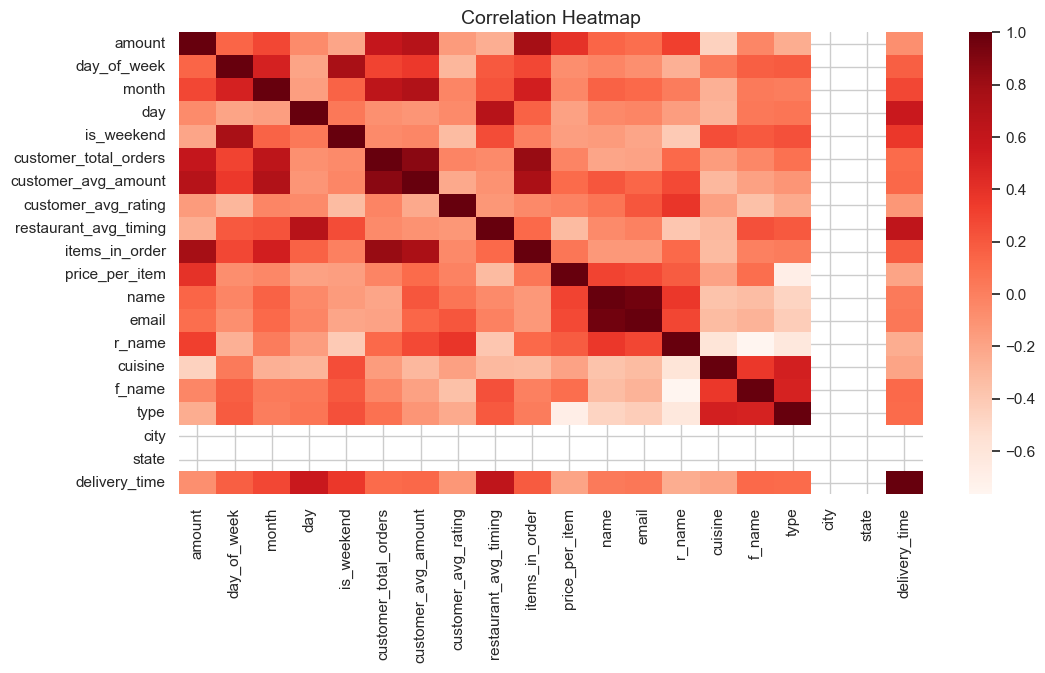

In [48]:
#Corelation Heatmap
#This shows which features influences delivery time the most 
plt.figure(figsize=(12,6))
sns.heatmap(final_df.corr(), annot=False, cmap="Reds")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

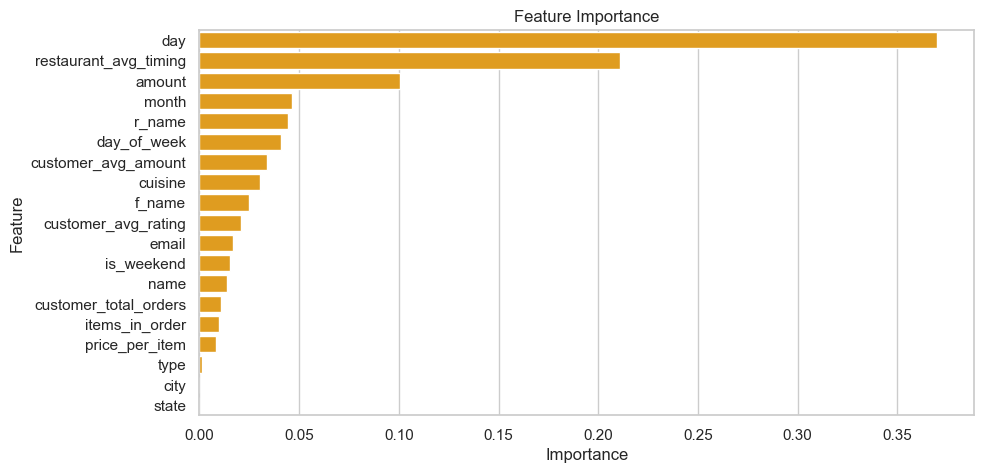

In [51]:
#Feature Selection & Importance (using Random Forest)
from sklearn.ensemble import RandomForestRegressor

x = final_df.drop(columns=["delivery_time"])
y = final_df["delivery_time"]

model = RandomForestRegressor()
model.fit(x, y)


importance = model.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": x.columns,
    "Importance": importance
}).sort_values(by="Importance",ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=feat_imp, x="Importance", y="Feature", color='orange')
plt.title("Feature Importance")
plt.show()

